In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
customers = pd.read_csv('C:/Users/91701/Downloads/Customers.csv')
transactions = pd.read_csv('C:/Users/91701/Downloads/Transactions.csv')

# Combine customers and transaction data
# Aggregate transaction data by customer ID
transactions_agg = transactions.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count']
}).reset_index()
transactions_agg.columns = ['CustomerID', 'TotalSpent', 'AvgSpent', 'TransactionCount']
categorical_columns = ['Region']
data = pd.get_dummies(customers, columns=categorical_columns, drop_first=True)
data = data[["CustomerID","Region_Europe","Region_North America","Region_South America"]]

In [4]:
transactions_agg

,CustomerID,TotalSpent,AvgSpent,TransactionCount
0,C0001,3354.52,670.904000,5
1,C0002,1862.74,465.685000,4
2,C0003,2725.38,681.345000,4
3,C0004,5354.88,669.360000,8
4,C0005,2034.24,678.080000,3
...,...,...,...,...
194,C0196,4982.88,1245.720000,4
195,C0197,1928.65,642.883333,3
196,C0198,931.83,465.915000,2
197,C0199,1979.28,494.820000,4


In [5]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [9]:
data

,CustomerID,CustomerName,SignupDate,Region_Europe,Region_North America,Region_South America
0,C0001,Lawrence Carroll,2022-07-10,0,0,1
1,C0002,Elizabeth Lutz,2022-02-13,0,0,0
2,C0003,Michael Rivera,2024-03-07,0,0,1
3,C0004,Kathleen Rodriguez,2022-10-09,0,0,1
4,C0005,Laura Weber,2022-08-15,0,0,0
...,...,...,...,...,...,...
195,C0196,Laura Watts,2022-06-07,1,0,0
196,C0197,Christina Harvey,2023-03-21,1,0,0
197,C0198,Rebecca Ray,2022-02-27,1,0,0
198,C0199,Andrea Jenkins,2022-12-03,1,0,0


In [8]:
categorical_columns = ['Region']
data = pd.get_dummies(customers, columns=categorical_columns, drop_first=True)

In [11]:
data = data[["CustomerID","Region_Europe","Region_North America","Region_South America"]]

In [12]:
data

,CustomerID,Region_Europe,Region_North America,Region_South America
0,C0001,0,0,1
1,C0002,0,0,0
2,C0003,0,0,1
3,C0004,0,0,1
4,C0005,0,0,0
...,...,...,...,...
195,C0196,1,0,0
196,C0197,1,0,0
197,C0198,1,0,0
198,C0199,1,0,0


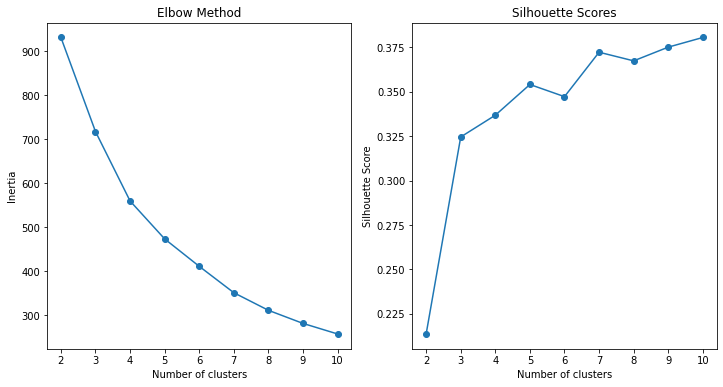

In [15]:
# Merge with customer profile data
data = pd.merge(data, transactions_agg, on='CustomerID', how='left')

# Handling missing values (if any)
data.fillna(0, inplace=True)

# Feature engineering: Drop columns not useful for clustering
X = data.drop(columns=['CustomerID'])

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine number of clusters using the Elbow method and Silhouette score
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plot the Silhouette score graph
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



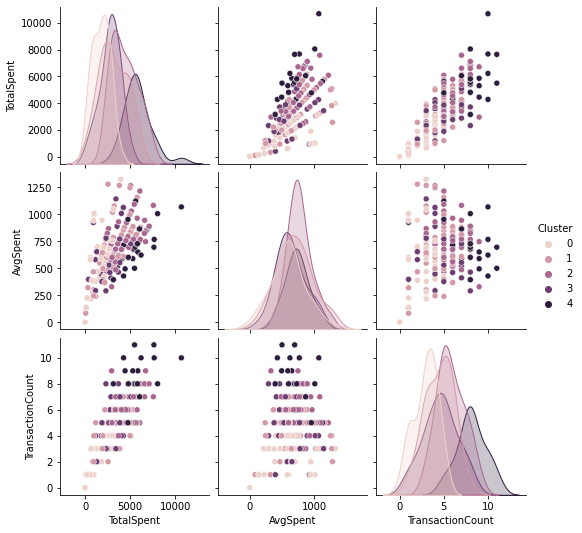

Number of clusters formed: 5
Davies-Bouldin Index: 1.10
Other Cluster Metrics:
Inertia: 473.41
Silhouette Score: 0.35


In [16]:
# Choose optimal number of clusters (assumption based on graphs)
optimal_clusters = 5  # Hypothetical value based on elbow method and silhouette score

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)

# Visualize the clusters
sns.pairplot(data, hue='Cluster', vars=['TotalSpent', 'AvgSpent', 'TransactionCount'])
plt.show()

# Report
print(f'Number of clusters formed: {optimal_clusters}')
print(f'Davies-Bouldin Index: {db_index:.2f}')
print(f'Other Cluster Metrics:')
print(f'Inertia: {kmeans.inertia_:.2f}')
print(f'Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_):.2f}')